# Load data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

car_df = pd.read_csv('car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Analysis

In [50]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [51]:
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Column name: buying 
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 

Column name: maint 
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 

Column name: doors 
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

Column name: persons 
2       576
4       576
more    576
Name: persons, dtype: int64 

Column name: lug_boot 
small    576
med      576
big      576
Name: lug_boot, dtype: int64 

Column name: safety 
low     576
med     576
high    576
Name: safety, dtype: int64 

Column name: class 
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



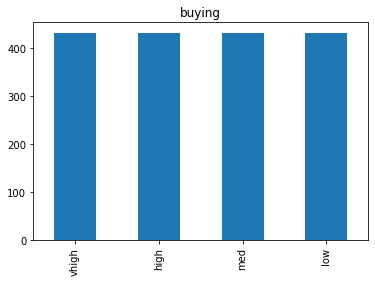

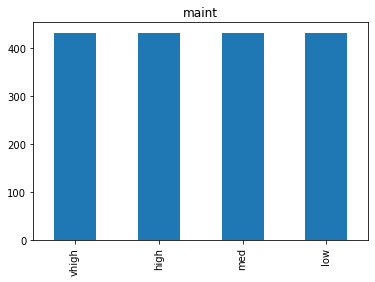

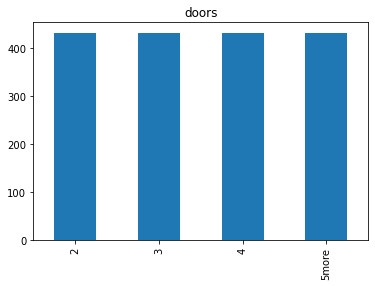

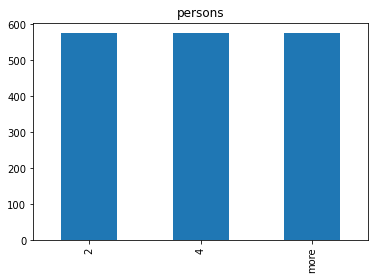

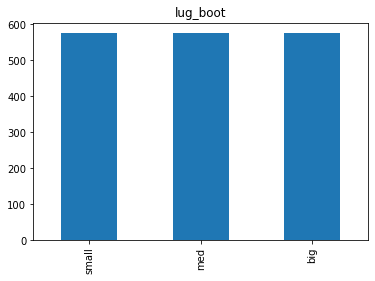

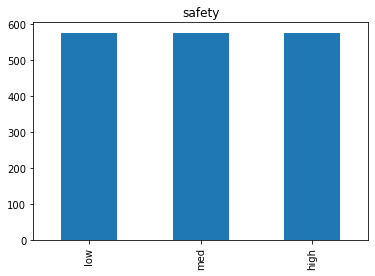

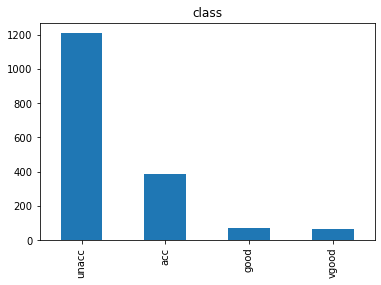

In [52]:
columns = car_df.columns

for col in car_df.columns:
    print(f"Column name: {col} \n{car_df[col].value_counts()} \n")
    plt.figure()
    car_df[col].value_counts().plot(kind='bar')
    plt.title(col)

#### Comments
The data seems to be unusual balanced, which seems a bit odd

In [53]:
# encode the data
price_mapping = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
car_df['buying'] = car_df['buying'].replace(price_mapping)
car_df['maint'] = car_df['maint'].replace(price_mapping)

doors_mapping = {'2': 1, '3': 2, '4': 3, '5more': 4}
car_df['doors'] = car_df['doors'].replace(doors_mapping)

persons_mapping = {'2': 1, '4': 2, 'more': 3}
car_df['persons'] = car_df['persons'].replace(persons_mapping)

lug_mapping = {'small': 1, 'med': 2, 'big': 3}
car_df['lug_boot'] = car_df['lug_boot'].replace(lug_mapping)

safety_mapping = {'low': 1, 'med': 2, 'high': 3}
car_df['safety'] = car_df['safety'].replace(safety_mapping)

class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
car_df['class'] = car_df['class'].replace(class_mapping)

car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,0
1,4,4,1,1,1,2,0
2,4,4,1,1,1,3,0
3,4,4,1,1,2,1,0
4,4,4,1,1,2,2,0


In [54]:
# further investigating
features = ['maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
target = "buying"

for i in features:
    print(car_df[[target, i]].value_counts())

buying  maint
1       1        108
        2        108
        3        108
        4        108
2       1        108
        2        108
        3        108
        4        108
3       1        108
        2        108
        3        108
        4        108
4       1        108
        2        108
        3        108
        4        108
dtype: int64
buying  doors
1       1        108
        2        108
        3        108
        4        108
2       1        108
        2        108
        3        108
        4        108
3       1        108
        2        108
        3        108
        4        108
4       1        108
        2        108
        3        108
        4        108
dtype: int64
buying  persons
1       1          144
        2          144
        3          144
2       1          144
        2          144
        3          144
3       1          144
        2          144
        3          144
4       1          144
        2          144
     

#### Comments
Unusual balanced dataset, only the class feature make more sense. 

# Machine Learning

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [84]:
X = car_df.drop(columns=['buying'])
y = car_df['buying']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [88]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [86]:
expected_y  = y_test
predicted_y = dtc.predict(X_test)

In [87]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33       127
           2       0.24      0.38      0.30       127
           3       0.22      0.21      0.22       127
           4       0.49      0.26      0.34       138

    accuracy                           0.29       519
   macro avg       0.32      0.30      0.30       519
weighted avg       0.33      0.29      0.30       519

[[42 55 25  5]
 [44 48 27  8]
 [22 54 27 24]
 [20 40 42 36]]


# Conclusion

The result is  comparably with only 29% accuracy, which could be attributed to factors such as data quality, underfitting, overfitting or other issue. The data appears to be unusual balanced for most features, which seesm a bit odd. Based on analysis, 
unacc class seems to have most very high price.

Given more time, would conduct further analysis to investigate the pattern, perform cross-validation, or explore other predictive models to improve the results.